# 2nd/3rd Principal Component Analyses and 3D Scatterplot (Thigh)

Here we will again explore the DrugMatrix data using dimensionality reduction and cluster analysis. However, because the first two principal components did not yield noticeable clusters on a 2 dimensional space, we will now use the 2nd and 3rd components as well as 3 dimensional plotting of the top 3 components in hopes to see visible variation among the data. 

### Principal Component Analysis

PCA reduces dimensionality by finding principal components. These are directions  of maximum variation in a dataset. This will allow us to reduce a dataset's original features to a set of new ones based on the principal components. In this way, we end up with the least amount of features that keep the maximum amount of variation about how the data is distributed.

## Preparing data 

Here we import the DrugMatrix (Thigh) CSV file of drugs and genes from the google drive folder as a dataframe entitled: 'DM_thigh1'

We will use the thigh df to create and explore PCA plots (using only the annotated (23,748) genes in DM's database.

In [4]:
import pandas as pd

#Original thigh df
DM_thigh = pd.read_table('https://drive.google.com/uc?export=download&id=0B3bVNa1CiFWdZUtBb2hUamtYY1E', sep='\t')

#DM_thigh2
DM_thigh2 = DM_thigh.dropna()
DM_thigh2.columns.names = ['Drugs']
DM_thigh2 = DM_thigh2.set_index('Gene')
DM_thigh2.head(15) #show top 15 genes

Drugs,FAMOTIDINE,FAMOTIDINE.1,DICYCLOMINE,DICYCLOMINE.1,BUSPIRONE,FLUNARIZINE,ETIDRONATE,CHLORPROPAMIDE,ETIDRONATE.1,LEVOSULPIRIDE,...,ATENOLOL.1,PENTOXIFYLLINE.1,DEXCHLORPHENIRAMINE.1,TRIMETHADIONE.1,GLYBURIDE.1,AZARIBINE.1,PHENYTOIN.1,GABAPENTIN.1,PAROXETINE.1,OXYBUTYNIN.1
Gene,,,,,,,,,,,,,,,,,,,,,
Map7,0.184,0.026,0.207,-0.010,0.070,0.074,0.108,-0.322,0.145,-0.149,...,0.075,-0.051,0.284,-0.180,-0.014,0.091,0.234,0.147,0.252,0.000
Trh,0.016,-0.184,0.167,0.083,-0.115,0.190,0.302,0.077,0.330,-0.145,...,0.075,0.234,-0.065,-0.104,0.078,-0.251,0.051,0.149,0.258,-0.020
Cpm,0.450,0.278,0.453,0.088,0.311,0.261,0.448,0.444,0.600,0.211,...,0.338,0.059,0.520,0.169,0.367,0.244,-0.043,0.259,0.182,-0.036
Gas2l3,0.040,-0.018,0.029,0.127,0.227,-0.178,-0.185,0.454,-0.463,0.456,...,0.285,-0.093,-0.529,0.344,0.321,-0.029,0.537,-0.135,-0.087,-0.028
Dicer1,0.009,0.032,0.089,-0.163,-0.221,-0.154,-0.019,-0.470,-0.057,-0.372,...,-0.403,-0.116,0.031,-0.044,-0.352,-0.039,-0.037,-0.012,0.042,-0.076
Rbm6,-0.029,-0.059,0.070,-0.004,0.040,0.048,-0.043,0.005,-0.008,0.101,...,0.070,0.003,0.002,-0.019,0.080,-0.074,-0.025,0.015,0.063,0.087
Pianp,0.288,0.281,0.146,-0.009,-0.083,-0.148,-0.142,0.089,0.039,-0.068,...,-0.019,0.013,-0.486,0.108,0.288,0.330,0.020,0.286,0.056,0.083
Spdl1,0.029,-0.042,-0.132,-0.678,-0.023,0.021,-0.334,0.100,-0.212,-0.056,...,0.071,-0.325,0.060,0.085,-0.007,-0.123,-0.174,0.063,-0.534,-0.376
Atxn2l,-0.032,0.057,0.064,-0.007,-0.261,-0.207,-0.018,-0.092,-0.004,-0.235,...,-0.248,-0.141,-0.057,-0.038,-0.102,-0.008,0.073,-0.112,0.115,0.010


In [2]:
print len(DM_thigh2.index) -2, "Genes" 
print len(DM_thigh2.columns) -1, "Drugs"

23748 Genes
41 Drugs


We specified index_col to be 0 in order to make the drug names the row labels. We used the '\t' separator because our csv is actually tab-delimited (not comma). The head() function shows the first 5 lines (by defalult) to ensure our output is correct.

## Interactive 3D plot (Top 3 PCs)

In [8]:
import plotly.plotly as py
py.sign_in('troypgoff', '2AWnQIHTKdriCuI6TdCp')
fig = py.get_figure("https://plot.ly/~TroyPgoff/18/")
py.iplot(fig)

[Link to 3Dplot](https://plot.ly/~TroyPgoff/50)

## Dimensionality Reduction

Ideally at this point we want to represent each drug in a two dimensional space. This dataset has each sample as a drug defined by 41 different variables - each corresponding to a distinct drug (or drug dosage).  

Python's Sci-kit machine learning library comes with PCA implementation

Here we transformed our data into a lower representation and put it into a new dataframe: 'DM_thigh2_2d'

We also can check the explained variance ratio as shown below.

In [2]:
from sklearn.decomposition import PCA

pca2 = PCA(n_components=3)
pca2.fit(DM_thigh2)

DM_2d2 = pca2.transform(DM_thigh2)

DM_thigh2_2d = pd.DataFrame(DM_2d2)
DM_thigh2_2d.index = DM_thigh2.index
DM_thigh2_2d.columns = ['PC1','PC2','PC3']
DM_thigh2_2d.head(10)
#DM_thigh2_2d.to_csv('C:\Users\Troy\Desktop\DM_thightsne.txt')

,PC1,PC2,PC3
Gene,,,
Map7,-0.087338,-0.549850,0.192393
Trh,0.149256,-0.500236,-0.027513
Cpm,1.267970,-0.426050,-0.160141
Gas2l3,0.892089,0.307768,0.578044
Dicer1,-1.026504,-0.265157,0.230576
Rbm6,0.264645,0.088768,-0.004129
Pianp,0.172917,-0.160438,0.268062
Spdl1,-0.184336,0.421677,-0.368803
Atxn2l,-0.527119,-0.016929,0.312360


In [4]:
print(pca2.explained_variance_ratio_)

[ 0.24849679  0.09730342  0.06764929]


## Plotting the data (PC1&2)

Here all we have to do is to call plot on the dataframe. We can add annotation loops that tag every point with it's drug name.

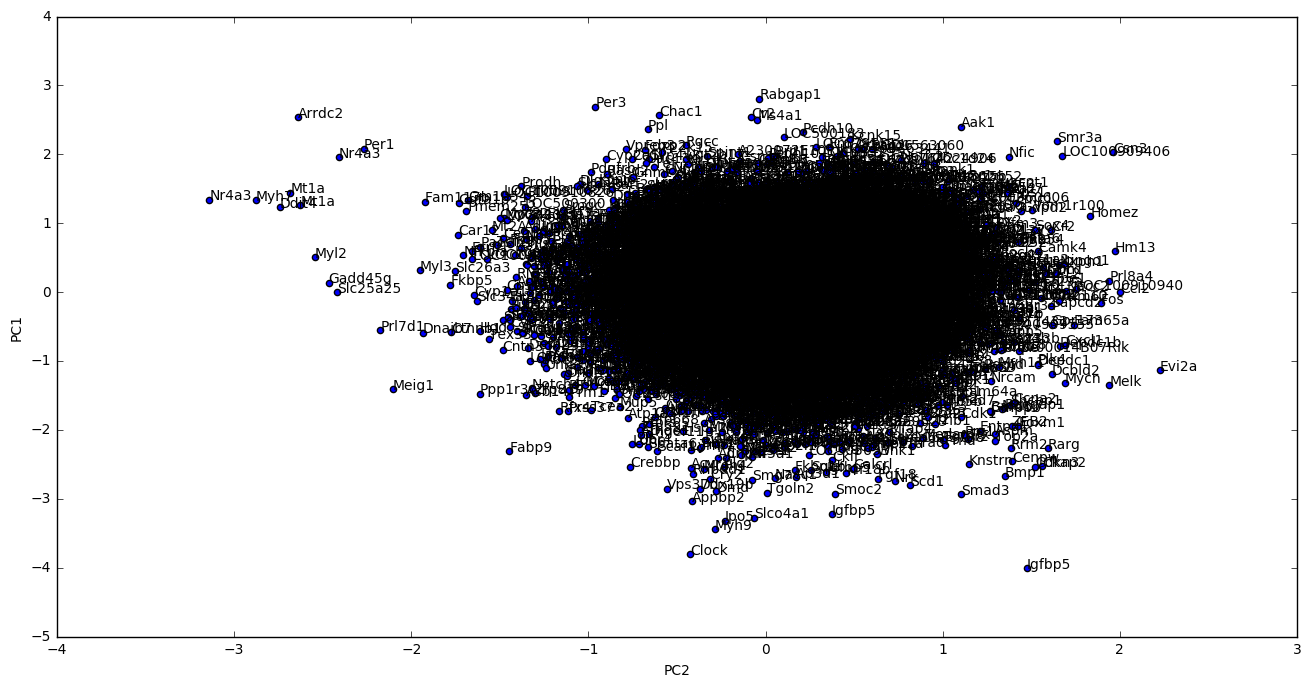

In [5]:
%matplotlib inline

ax = DM_thigh2_2d.plot(kind='scatter', x='PC2', y='PC1', figsize=(16,8))

for i, Drug in enumerate(DM_thigh2.index):
    ax.annotate(Drug, (DM_thigh2_2d.iloc[i].PC2, DM_thigh2_2d.iloc[i].PC1))

## Plotting the data (PC2&3)

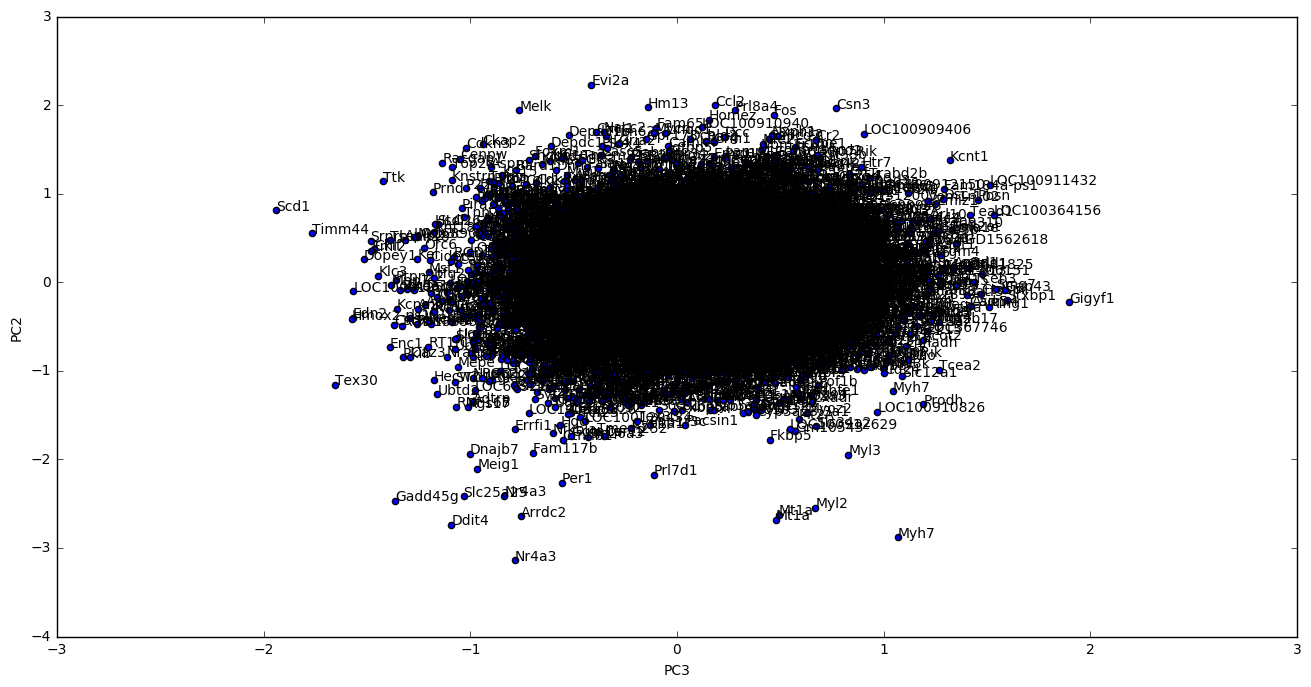

In [ ]:
%matplotlib inline

ax = DM_thigh2_2d.plot(kind='scatter', x='PC3', y='PC2', figsize=(16,8))

for i, Drug in enumerate(DM_thigh2.index):
    ax.annotate(Drug, (DM_thigh2_2d.iloc[i].PC3, DM_thigh2_2d.iloc[i].PC2))